Data Reading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


cell_df = pd.read_csv('DatasetsF.csv')
cell_df.head()

,Openness,MAR,Kelas
0,0.034188,0.225308,1
1,0.376313,0.192497,1
2,0.378906,0.172807,1
3,0.375000,0.164998,1
4,0.392857,0.179707,1


In [4]:
cell_df.shape

(424930, 3)

In [5]:
X = cell_df.iloc[:,[0,1]]
Y = cell_df.iloc[:,2]

In [6]:
X.head()

,Openness,MAR
0,0.034188,0.225308
1,0.376313,0.192497
2,0.378906,0.172807
3,0.375000,0.164998
4,0.392857,0.179707


In [7]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: Kelas, dtype: int64

Data Split

In [8]:
from sklearn.model_selection import train_test_split
X_Train, X_Test,Y_Train,Y_Test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [9]:
print("training data : ", X_Train.shape)
print("Test data : ",X_Test.shape)

training data :  (318697, 2)
Test data :  (106233, 2)


Normalisasi Data

In [10]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [11]:
import pickle

with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(sc_X, f)


Data Training

Linear Kernel

In [12]:
# import SVC classifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

svc=SVC(kernel='linear') 


# fit classifier to training set
svc.fit(X_Train,Y_Train)


# make predictions on test set
y_pred=svc.predict(X_Test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_Test, y_pred)))

Model accuracy score with default hyperparameters: 0.4240


In [13]:
import pickle
filename = 'models/model_linear.pkl'
pickle.dump(svc, open(filename, 'wb'))

RBF Kernel

In [14]:
# import SVC classifier
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

svc=SVC(kernel='rbf') 


# fit classifier to training set
svc.fit(X_Train,Y_Train)


# make predictions on test set
y_pred=svc.predict(X_Test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_Test, y_pred)))

Model accuracy score with default hyperparameters: 0.5433


In [17]:
import pickle
filename = 'models/model_rbf.pkl'
pickle.dump(svc, open(filename, 'wb'))

import pickle
filename = 'model_rbf.pkl'
pickle.dump(svc, open(filename, 'wb'))

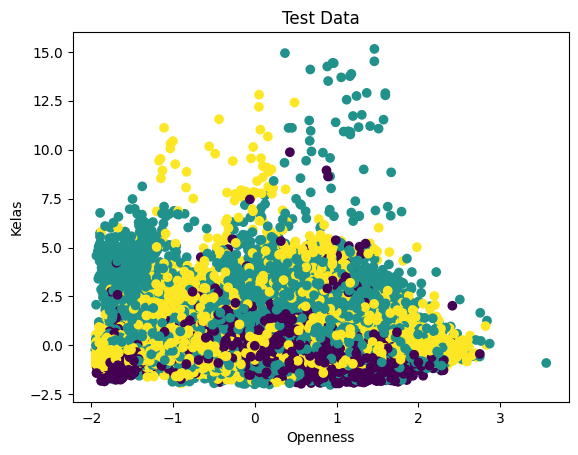

In [15]:
import matplotlib.pyplot as plt

plt.scatter(X_Test[:, 0], X_Test[:,1],c=Y_Test)
plt.xlabel('Openness')
plt.ylabel('Kelas')
plt.title('Test Data')
plt.show()  

In [16]:
cell_df.columns
feature_df = cell_df[['Number','Openness','MAR','Kelas']]

X = np.asarray(feature_df)
y = np.asarray(cell_df['Kelas'])

y[0:5]

KeyError: "['Number'] not in index"